In [1]:
from scipy.special import expit
from rbmpy.rbm import RBM
from rbmpy.sampler import VanillaSampler,ContinuousSampler,ContinuousApproxSampler, ContinuousApproxMulDimSampler, ApproximatedSampler, LayerWiseApproxSampler,ApproximatedMulDimSampler
from rbmpy.trainer import VanillaTrainier
from rbmpy.performance import Result
import numpy as np
import rbmpy.datasets, rbmpy.performance, rbmpy.plotter, pickle, rbmpy.rbm, os, logging, rbmpy.sampler,math
import math
from rbmpy.rbm import weights_into_hiddens

import rbmpy.plotter as pp
from numpy import newaxis
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

logger = logging.getLogger()
# Set the logging level to logging.DEBUG 
logger.setLevel(logging.INFO)

%matplotlib inline

In [3]:
ds_zeros = np.load('datasets/0.npy')
ds_ones = np.load('datasets/1.npy')
ds_twos = np.load('datasets/2.npy')
ds_three = np.load('datasets/3.npy')
ds_four = np.load('datasets/4.npy')
ds_five = np.load('datasets/5.npy')
ds_six = np.load('datasets/6.npy')
ds_seven = np.load('datasets/7.npy')
ds_eight = np.load('datasets/8.npy')
ds_nine = np.load('datasets/9.npy')
ds = [ds_zeros, ds_ones, ds_twos, ds_three, ds_four,ds_five,ds_six,ds_seven,ds_eight,ds_nine]

In [4]:
def train_two_models(dataset_one, dataset_two,num_hid, epochs ,training_size = 100):

    ds_1_train = dataset_one[0:training_size]
    ds_2_train = dataset_two[0:training_size]
    ds_comp_train = np.maximum(ds_2_train, ds_1_train)
    
    return (get_model_and_trainer(num_hid[0],ds_1_train,epochs[0]),  get_model_and_trainer(num_hid[1],ds_2_train,epochs[1]))


def eval_complex_model(model):
    sampler = ContinuousSampler(model)
    
    num_vis = round(math.sqrt(model.visible.shape[1]))
    
    logging.info("Reconstruction/Samples")
    pp.images(sampler.reconstruction_given_visible(model.visible).reshape(model.visible.shape[0],28,28)[0:5])
    logging.info("Dreams")
    dream = sampler.dream(model)
    print(dream.min(), dream.max())
    pp.image(dream.reshape(num_vis,num_vis), color_range= (0,1))
    logging.info("Hinton Diagrams 0 - 10")
    pp.images(rbmpy.rbm.weights_into_hiddens(model.weights)[:15], cmap="Greys")

In [5]:
def get_model_and_trainer(num_hid, training, epochs, batches, l_r = 0.002):
    training_size = training.shape[0]
    num_vis = training.shape[1] * training.shape[2]
    model = RBM(num_hid,num_vis, training_size)
    trainerer(model, training, epochs, l_r, batches)
#     trainer.train(epochs, rbmpy.datasets.flatten_data_set(training), learning_rate = l_r,logging_freq=10)
    return model

def trainerer(model,training,epochs,l_r, batches):
    sampler = ContinuousSampler(model)
    trainer = VanillaTrainier(model, sampler)
    trainer.batch_train(epochs,rbmpy.datasets.flatten_data_set(training), batches, learning_rate = l_r)
    
def save_model(model, name):
    with open("models/{}".format(name), 'wb') as f:
        pickle.dump(model,f)

In [7]:
a=  get_model_and_trainer(300, ds_zeros[:200], 1000, 5,l_r=0.006)
!say "Done."

INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete


In [8]:
for d in ds[1:]:
    trainerer(a,d[:200], 1000,l_r = 0.006, batches= 5 )

INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete
INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete
INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete
INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete
INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Log

In [9]:
!say "Completely finished!"

In [58]:
trainerer(a,ds_nine[:200], 500,l_r = 0.002, batches= 5 )



INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete


INFO:root:Reconstruction/Samples


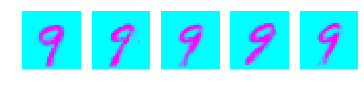

INFO:root:Dreams


3.74707945964e-09 0.998004527755


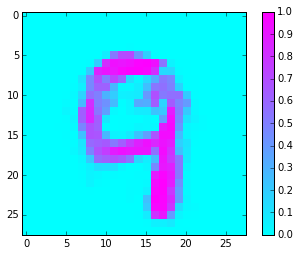

INFO:root:Hinton Diagrams 0 - 10


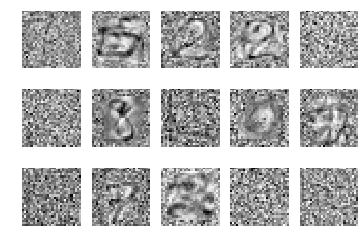

In [11]:
eval_complex_model(a)

In [12]:
save_model(a, "all_models")

In [15]:
a,b = train_two_models(ds_ones[:100],ds_twos[:100],(300 ,300),(100,100))

INFO:VanillaTrainier:Created Progress logger for task - VanillaTrainier
INFO:VanillaTrainier:0.0% complete
INFO:VanillaTrainier:5.0% complete
INFO:VanillaTrainier:10.0% complete
INFO:VanillaTrainier:15.0% complete
INFO:VanillaTrainier:20.0% complete
INFO:VanillaTrainier:25.0% complete
INFO:VanillaTrainier:30.0% complete
INFO:VanillaTrainier:35.0% complete
INFO:VanillaTrainier:40.0% complete
INFO:VanillaTrainier:45.0% complete
INFO:VanillaTrainier:50.0% complete
INFO:VanillaTrainier:60.0% complete
INFO:VanillaTrainier:65.0% complete
INFO:VanillaTrainier:70.0% complete
INFO:VanillaTrainier:75.0% complete
INFO:VanillaTrainier:80.0% complete
INFO:VanillaTrainier:85.0% complete
INFO:VanillaTrainier:90.0% complete
INFO:VanillaTrainier:95.0% complete
INFO:VanillaTrainier:Created Progress logger for task - VanillaTrainier
INFO:VanillaTrainier:0.0% complete
INFO:VanillaTrainier:5.0% complete
INFO:VanillaTrainier:10.0% complete
INFO:VanillaTrainier:15.0% complete
INFO:VanillaTrainier:20.0% compl